In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


# ARMA Implementation - Basic Model
# 1. At-least 5 individual sensible sensors.
# 2. Auto-Correl plot to iderntify order of ARMA
# 3. Determine params - AICb
# 4. Select Threshold for detection - reason
# 5. Study Detected Anamolies
# 6. What kind of Analmolies can ARMA model?
# 7. Which Signals are good?

def parser(x):
    return pd.datetime.strptime(x, '%d/%m/%y %H')

train_dataset = pd.read_csv('dataset/training_1_clean.csv',na_filter=True, header=0, parse_dates=[0], index_col=0, squeeze=True,date_parser=parser)
tune_dataset  = pd.read_csv('dataset/training_2_clean.csv',na_filter=True, header=0, parse_dates=[0], index_col=0, squeeze=True,date_parser=parser)
test_dataset  = pd.read_csv('dataset/testing.csv',na_filter=True, header=0, parse_dates=[0], index_col=0, squeeze=True,date_parser=parser)

0.006432171620535719


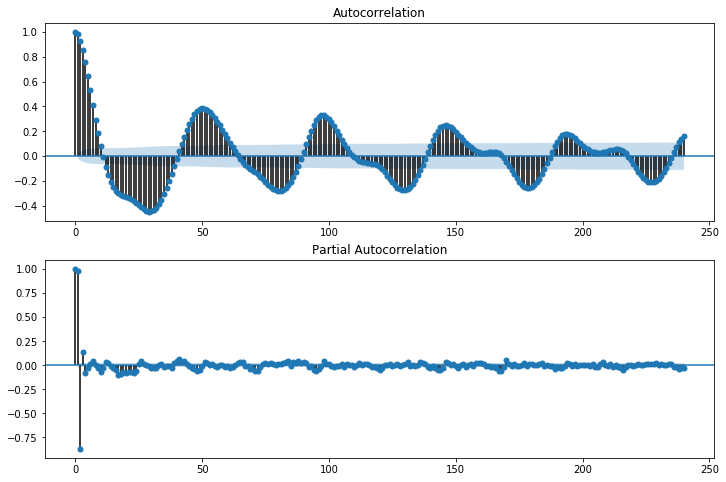

In [2]:
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_dataset.iloc[:,0].values.squeeze(), lags=240, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_dataset.iloc[:,0], lags=240, ax=ax2)
plt.savefig('test_par_auto_corr.png', dpi=300, bbox_inches='tight')
print(sm.stats.durbin_watson(train_dataset.iloc[:,0]))

In [3]:
columns_train = train_dataset.columns.values
columns_tests = test_dataset.columns.values

categorical_columns = []
continuous_columns = []
labels_column = []
for i, val in enumerate(train_dataset.iloc[1]):
    if val in [0, 1]:
        categorical_columns.append(columns_train[i])
    elif val in ["0\\"]:
        labels_column.append(columns_train[i])
    else:
        continuous_columns.append(columns_train[i])


print ("--------Columns Available-------- : Total - " + str(len(train_dataset.columns.values)))
print ("--------Categorical Available-------- : Total - " + str(len(categorical_columns)))
print ("--------Continous Available-------- : Total - " + str(len(continuous_columns)))

print(categorical_columns)
print(continuous_columns)

--------Columns Available-------- : Total - 44
--------Categorical Available-------- : Total - 17
--------Continous Available-------- : Total - 26
['S_PU1', 'S_PU2', 'F_PU3', 'S_PU3', 'S_PU4', 'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'S_PU7', 'S_PU8', 'F_PU9', 'S_PU9', 'S_PU10', 'F_PU11', 'S_PU11', 'S_V2']
['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1', 'F_PU2', 'F_PU4', 'F_PU7', 'F_PU8', 'F_PU10', 'F_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422']


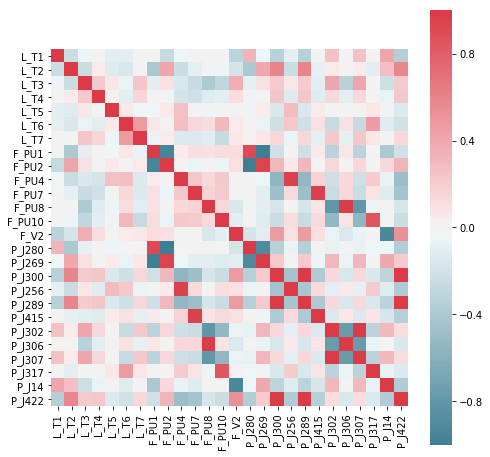

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,F_PU2,F_PU4,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
DATETIME,,,,,,,,,,,,,,,,,,,,,
2014-01-06 00:00:00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,99.018150,35.536686,...,26.426495,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471
2014-01-06 01:00:00,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,99.115639,34.454914,...,26.422962,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256
2014-01-06 02:00:00,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,98.440498,33.487091,...,26.427771,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538
2014-01-06 03:00:00,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,97.594460,32.585545,...,26.519985,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952
2014-01-06 04:00:00,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,97.370277,31.469677,...,26.671642,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263
2014-01-06 05:00:00,0.791114,2.773177,5.155802,3.937262,3.191528,5.322743,3.988906,94.135468,94.153748,0.000000,...,31.443146,76.848953,31.443146,67.832695,30.366247,64.369881,30.366247,60.329407,33.749393,32.849392
2014-01-06 06:00:00,1.186589,3.536068,4.983953,3.018011,2.859591,5.066728,2.977463,95.258003,95.276611,0.000000,...,29.259064,75.703812,29.219223,87.435600,30.004425,63.333805,30.004425,58.606335,31.808870,30.908869
2014-01-06 07:00:00,1.420449,3.872926,4.747458,3.581882,2.359944,5.152646,2.953742,96.947456,96.966560,0.000000,...,29.200378,73.617569,29.160114,86.829086,26.536455,62.231846,26.414701,68.808609,31.700340,30.800341
2014-01-06 08:00:00,1.534827,4.138434,4.417932,3.959265,1.748313,5.395835,3.228596,96.970291,96.989403,0.000000,...,29.458397,74.182251,29.420120,89.644714,26.605623,60.656143,26.484545,69.221718,31.939442,31.039440


In [4]:
arma_train1 = train_dataset[continuous_columns]
arma_label = train_dataset[labels_column]

f, ax = plt.subplots(figsize=(8, 8))
corr = arma_train1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

arma_train1

In [5]:
# FInd best order of AIC 
#ARMA is a parametric model. 
#These parameters indicate how many historical data points and error information will be used to predict a new data point. 
#ARMA parameters can be chosen in several ways. 
#One of them is AIC value. 
#The lower AIC value shows the better fit between the original signal and the modeled one. 
#This information can be used for a grid search.

print("No.of Columns (signal data) - " + str(len(arma_train1.columns)))
arma_mod = []
q_list=[]
p_list=[]

for idx in range(1, len(arma_train1.columns)-1):
    aic = []
    Mod = []
    P = []
    Q = []
    for p in range(1,6):
        for q in range(4):
            try:
                signal_data = np.array(arma_train1.iloc[:,idx])
                mod = sm.tsa.ARMA(signal_data,(p,q)).fit(disp=0)
                Mod.append(mod)
                aic.append(mod.aic)
                P.append(p)
                Q.append(q)
            except:
                pass
            
    index_min = np.argmin(aic)
    print("For Signal - " + str(arma_train1.columns[idx]))
    print("optimal p,q: " + str(P[index_min])+','+str(Q[index_min]))
    arma_mod.append(Mod[index_min])
    p_list.append(P[index_min])
    q_list.append(Q[index_min])

No.of Columns (signal data) - 26


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in divide
  (1+np.exp(-params))).copy()
/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: invalid value encountered in divide
  (1+np.exp(-params))).copy()
/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/tsatools.py:634: RuntimeWarning: invalid value encountered in log
  invarcoefs = -np.log((1-params)/(1+params))


For Signal - L_T2
optimal p,q: 5,2


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


For Signal - L_T3
optimal p,q: 5,3
For Signal - L_T4
optimal p,q: 5,2
For Signal - L_T5
optimal p,q: 4,3
For Signal - L_T6
optimal p,q: 4,3
For Signal - L_T7
optimal p,q: 5,3


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


For Signal - F_PU1
optimal p,q: 3,2


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


For Signal - F_PU2
optimal p,q: 5,2
For Signal - F_PU4
optimal p,q: 4,2
For Signal - F_PU7
optimal p,q: 5,2
For Signal - F_PU8
optimal p,q: 4,3
For Signal - F_PU10
optimal p,q: 5,2
For Signal - F_V2
optimal p,q: 4,3


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retva

For Signal - P_J280
optimal p,q: 3,3


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


For Signal - P_J269
optimal p,q: 3,2


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


For Signal - P_J300
optimal p,q: 4,3
For Signal - P_J256
optimal p,q: 4,3


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed 

For Signal - P_J289
optimal p,q: 4,3
For Signal - P_J415
optimal p,q: 5,2
For Signal - P_J302
optimal p,q: 5,3


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


For Signal - P_J306
optimal p,q: 4,3


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


For Signal - P_J307
optimal p,q: 5,3
For Signal - P_J317
optimal p,q: 5,3
For Signal - P_J14
optimal p,q: 5,3


In [6]:
#Print and Test
print(len(arma_mod))
print(p_list)
print(q_list)

24
[5, 5, 5, 4, 4, 5, 3, 5, 4, 5, 4, 5, 4, 3, 3, 4, 4, 4, 5, 5, 4, 5, 5, 5]
[2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3]


In [7]:
from pandas import DataFrame



columns_train = tune_dataset.columns.values
categorical_columns = []
continuous_columns = []
labels_column = []
for i, val in enumerate(tune_dataset.iloc[1]):
    if val in [0, 1]:
        categorical_columns.append(columns_train[i])
    else:
        continuous_columns.append(columns_train[i])
        
arma_tune1       = tune_dataset[continuous_columns].dropna()
arma_tune_label  = arma_tune1.iloc[:,-1]

# Label Series Correction:
arma_tune_label = arma_tune_label.reindex()
label_temp = np.zeros(len(arma_tune_label))

print("Uniqueee---")
print(arma_tune_label.unique())

unique = arma_tune_label.unique()

for i, lab in enumerate(arma_tune_label):
    if "999" in str(arma_tune_label[i]):
        label_temp[i] = '0'
    else:
        label_temp[i] = '1'
            
print(np.sum(label_temp))



Uniqueee---
['-999\\' '1\\' '-999}']
219.0


Column Index --- 1, Column Name -- L_T2


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


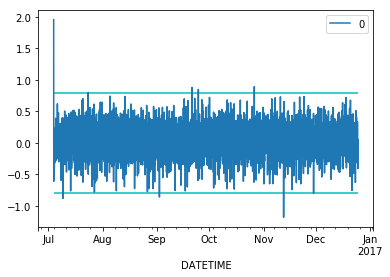

Threshold - 0    0.792581
Name: 0.998, dtype: float64
Column Index --- 2, Column Name -- L_T3


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


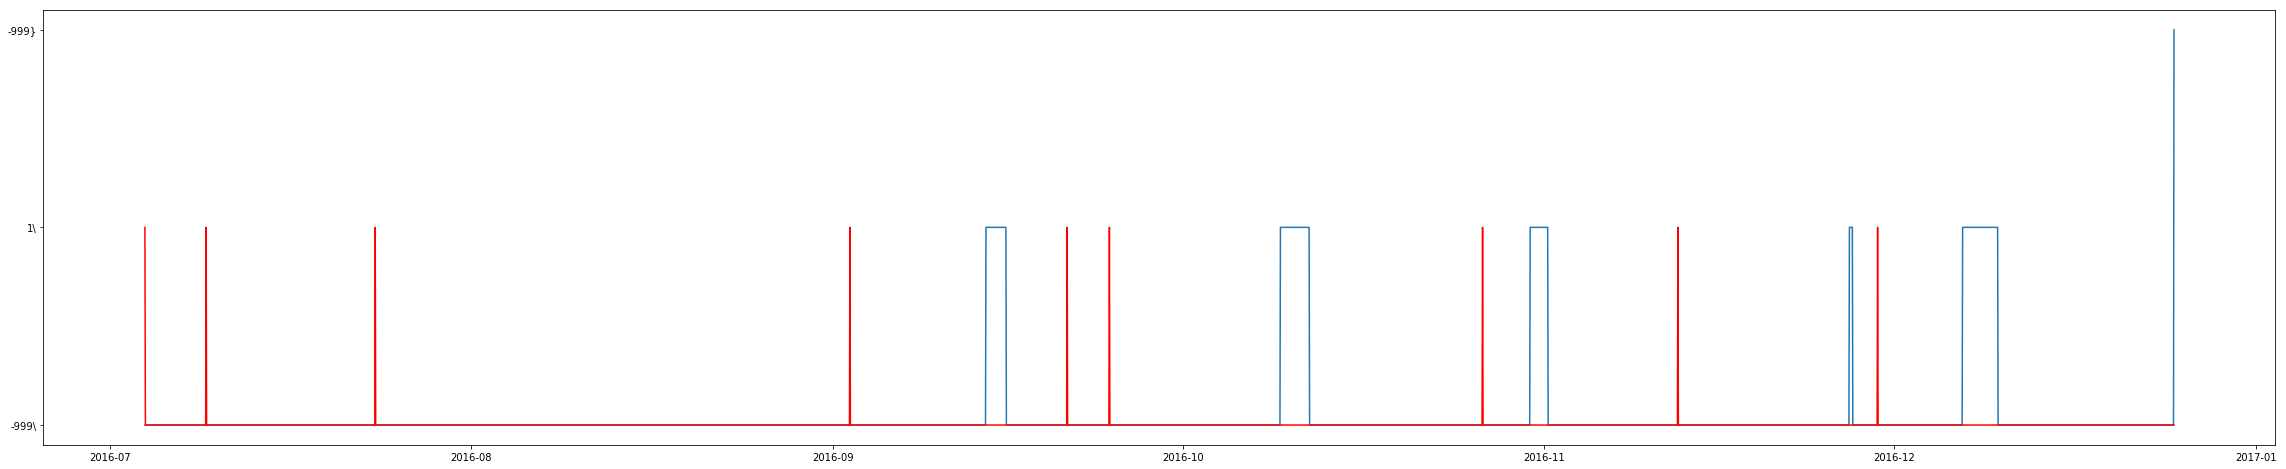

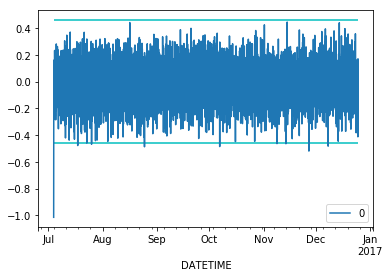

Threshold - 0    0.462792
Name: 0.998, dtype: float64
Column Index --- 3, Column Name -- L_T4


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


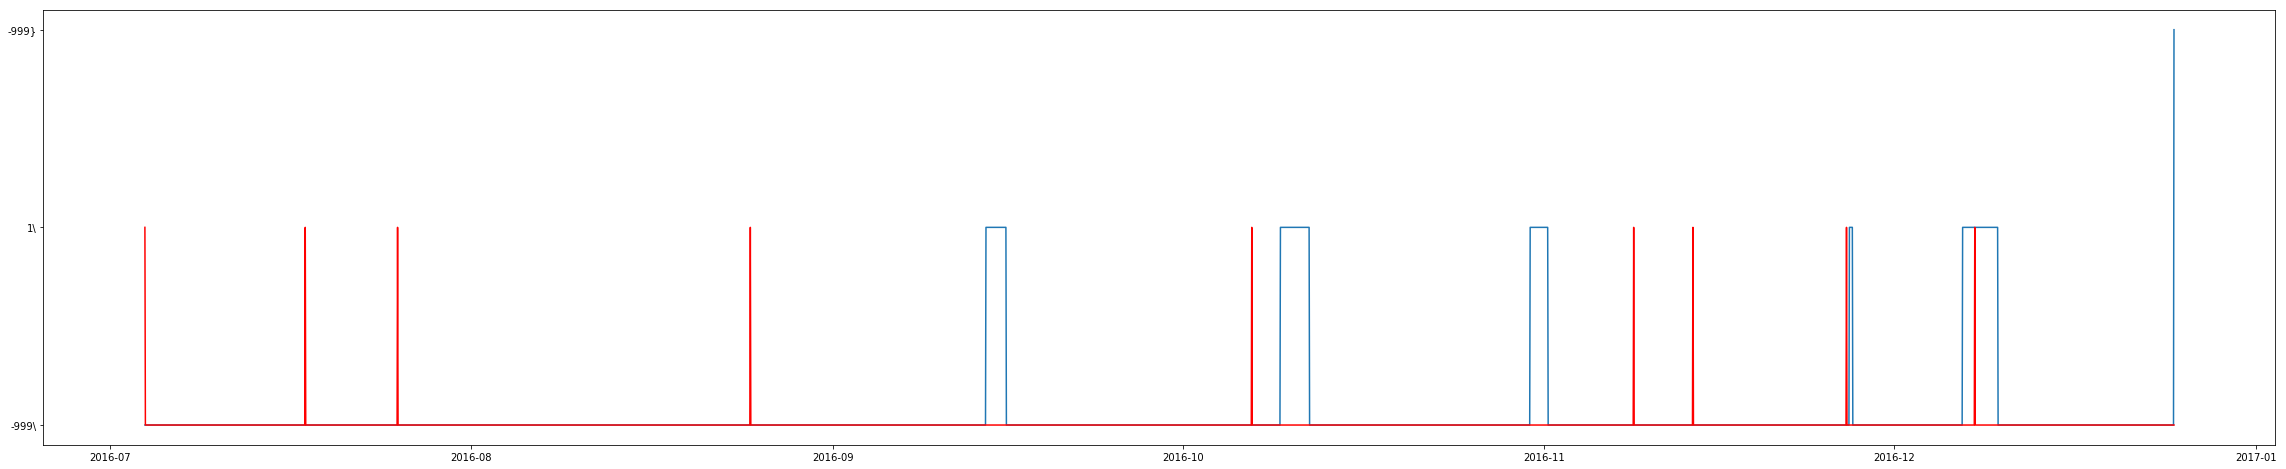

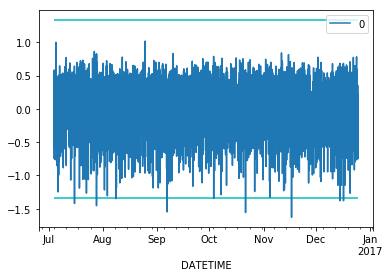

Threshold - 0    1.339828
Name: 0.998, dtype: float64
Column Index --- 4, Column Name -- L_T5


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


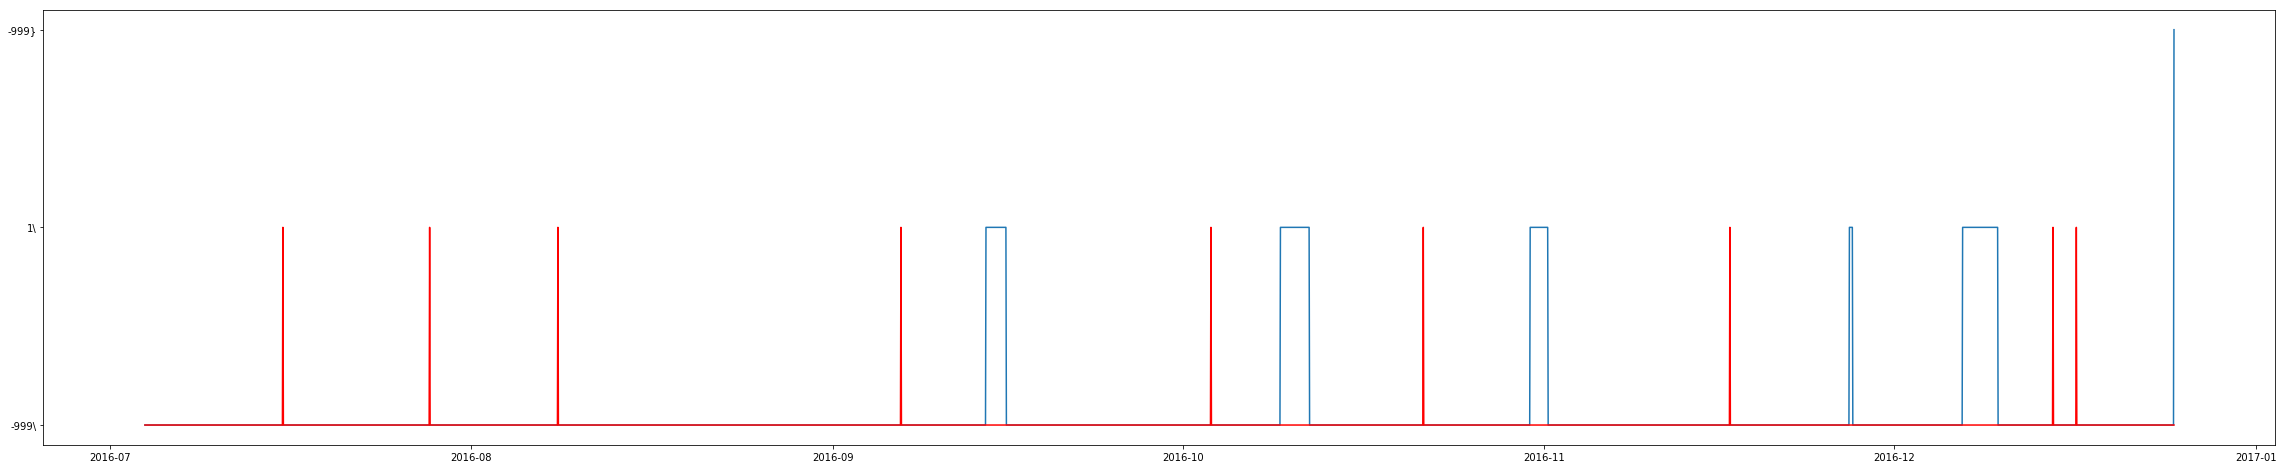

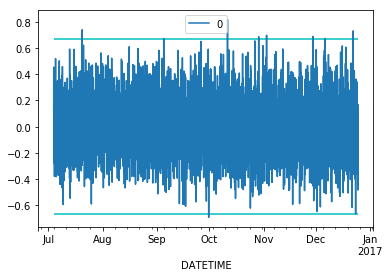

Threshold - 0    0.669619
Name: 0.998, dtype: float64
Column Index --- 5, Column Name -- L_T6


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


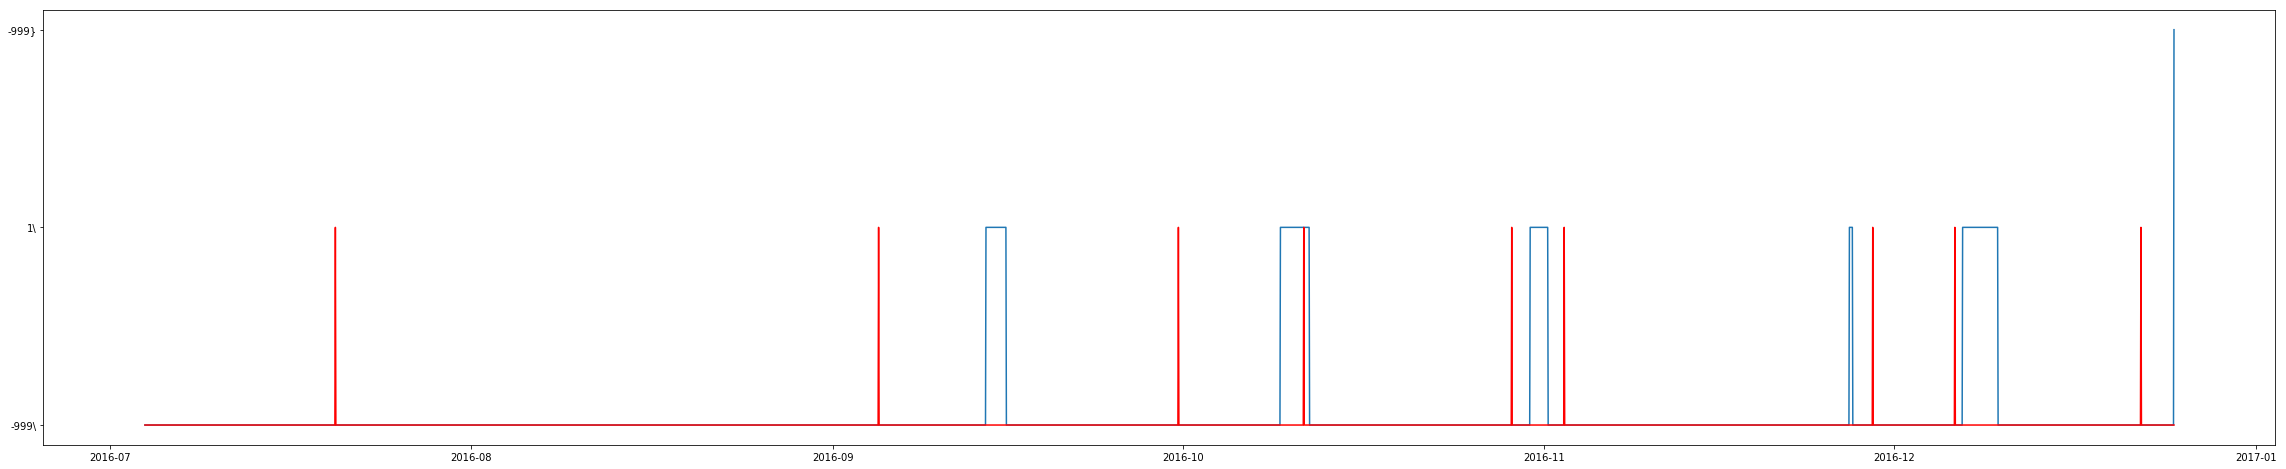

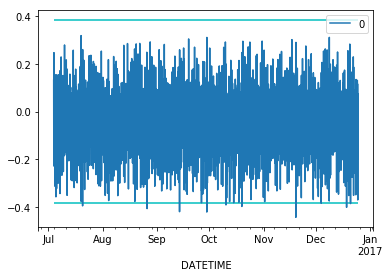

Threshold - 0    0.384359
Name: 0.998, dtype: float64
Column Index --- 6, Column Name -- L_T7


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


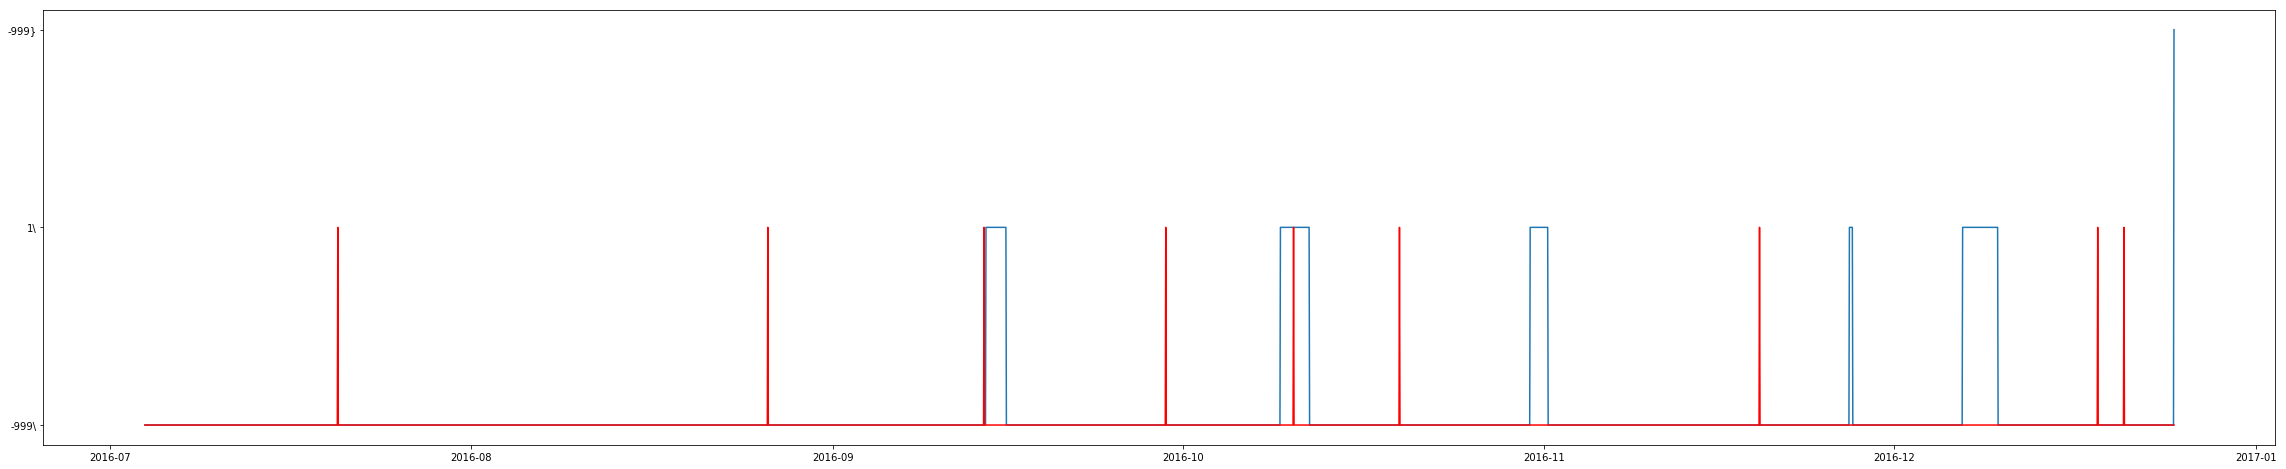

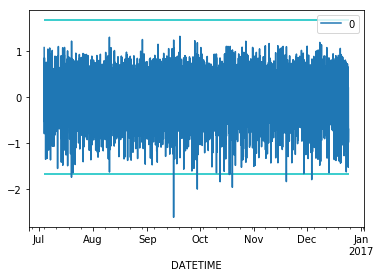

Threshold - 0    1.67218
Name: 0.998, dtype: float64
Column Index --- 7, Column Name -- F_PU1


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


Column Index --- 8, Column Name -- F_PU2


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


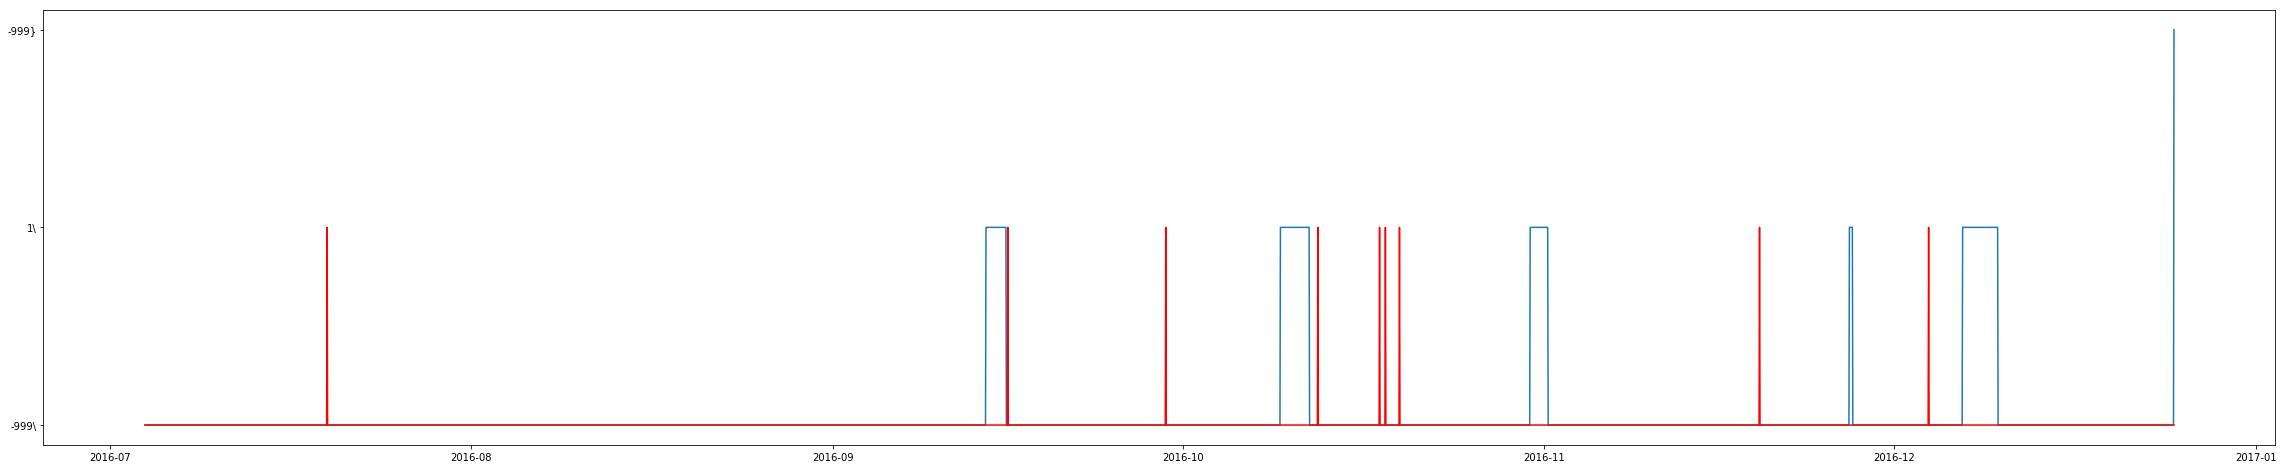

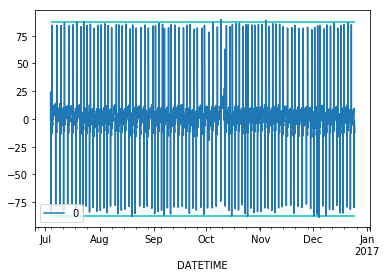

Threshold - 0    87.535265
Name: 0.998, dtype: float64
Column Index --- 9, Column Name -- F_PU4


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


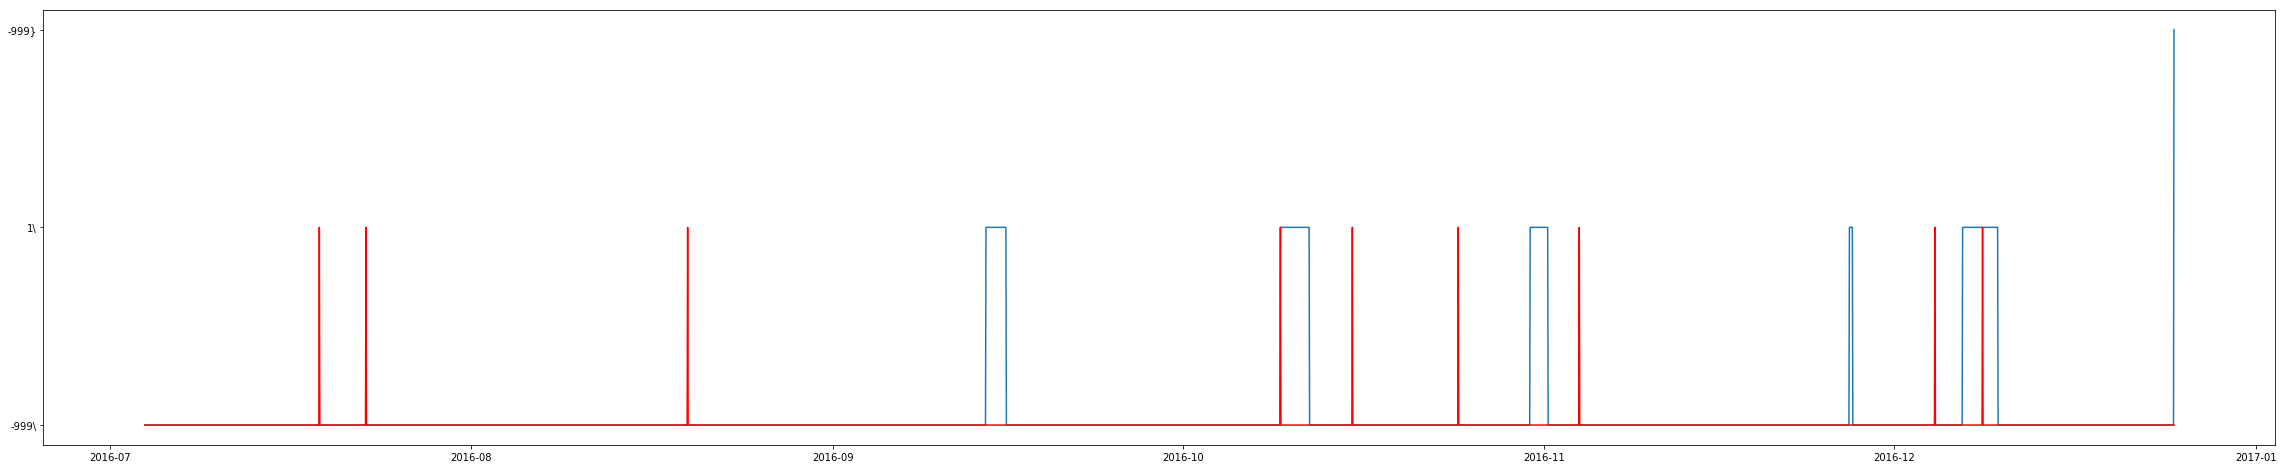

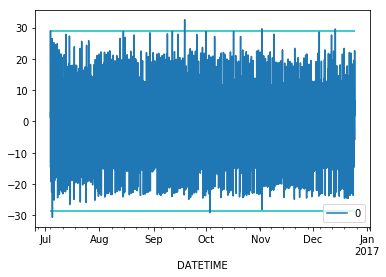

Threshold - 0    28.742001
Name: 0.998, dtype: float64
Column Index --- 10, Column Name -- F_PU7


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


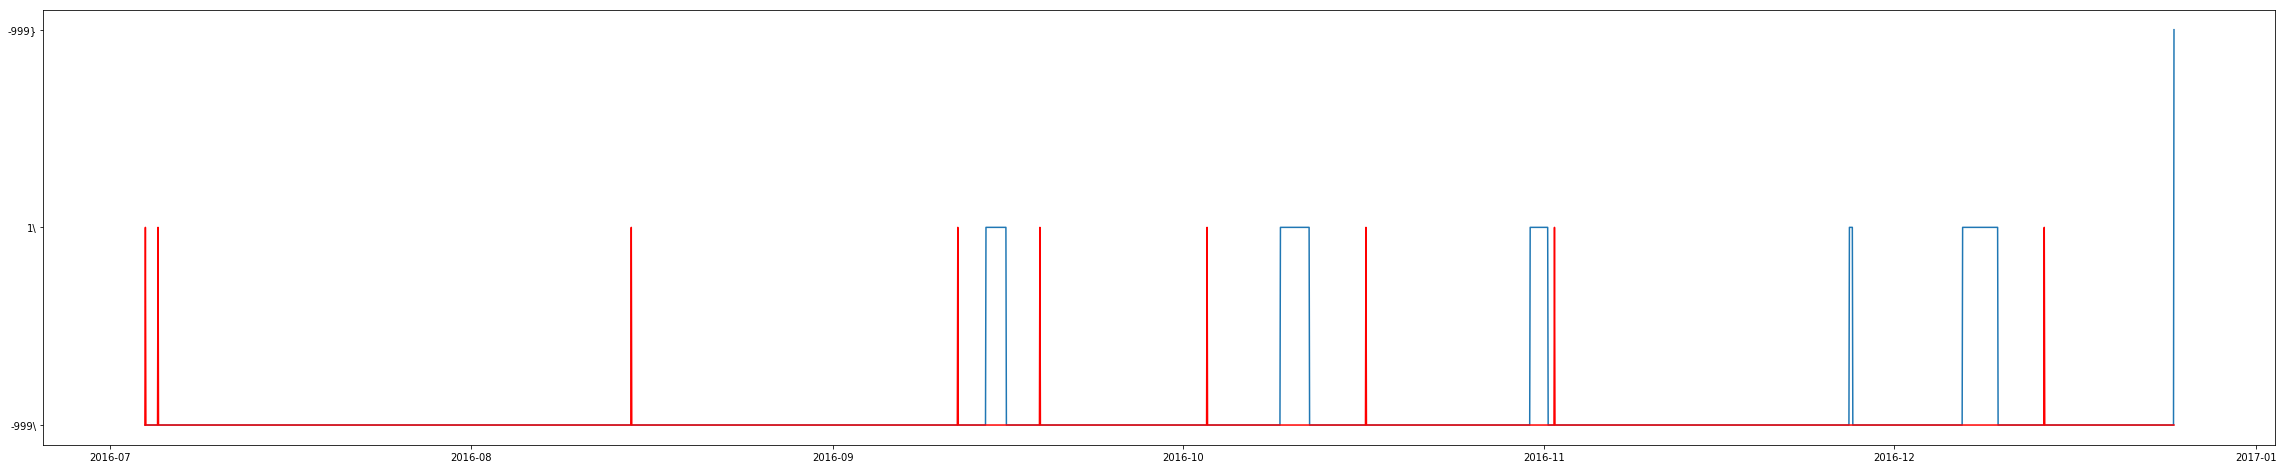

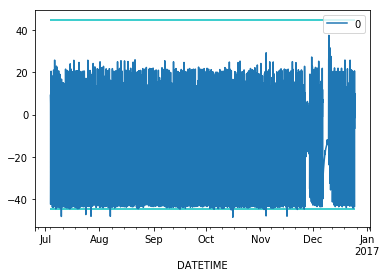

Threshold - 0    45.019477
Name: 0.998, dtype: float64
Column Index --- 11, Column Name -- F_PU8


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


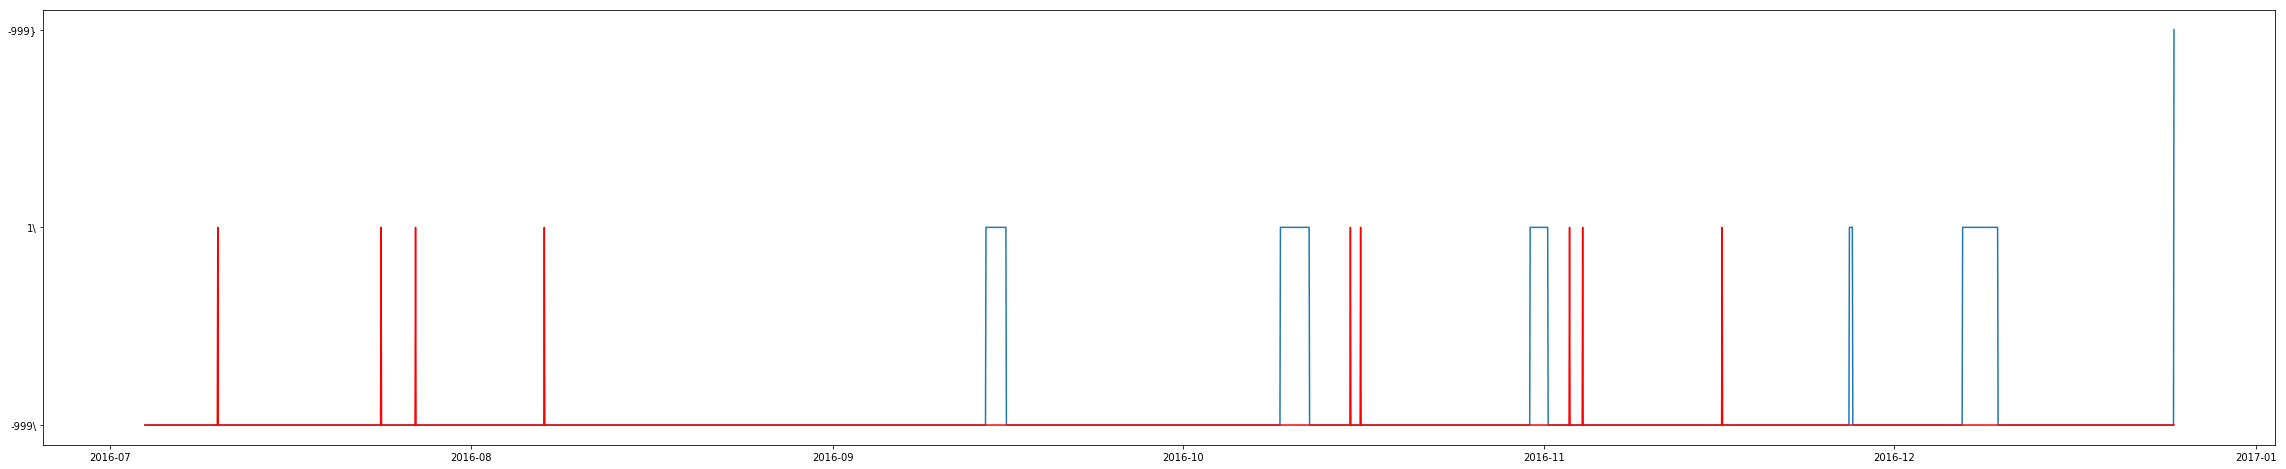

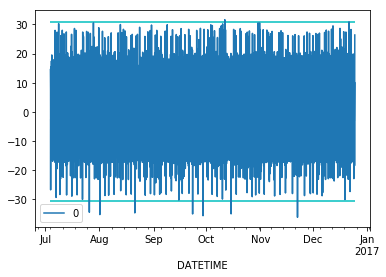

Threshold - 0    30.772874
Name: 0.998, dtype: float64
Column Index --- 12, Column Name -- P_J280


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


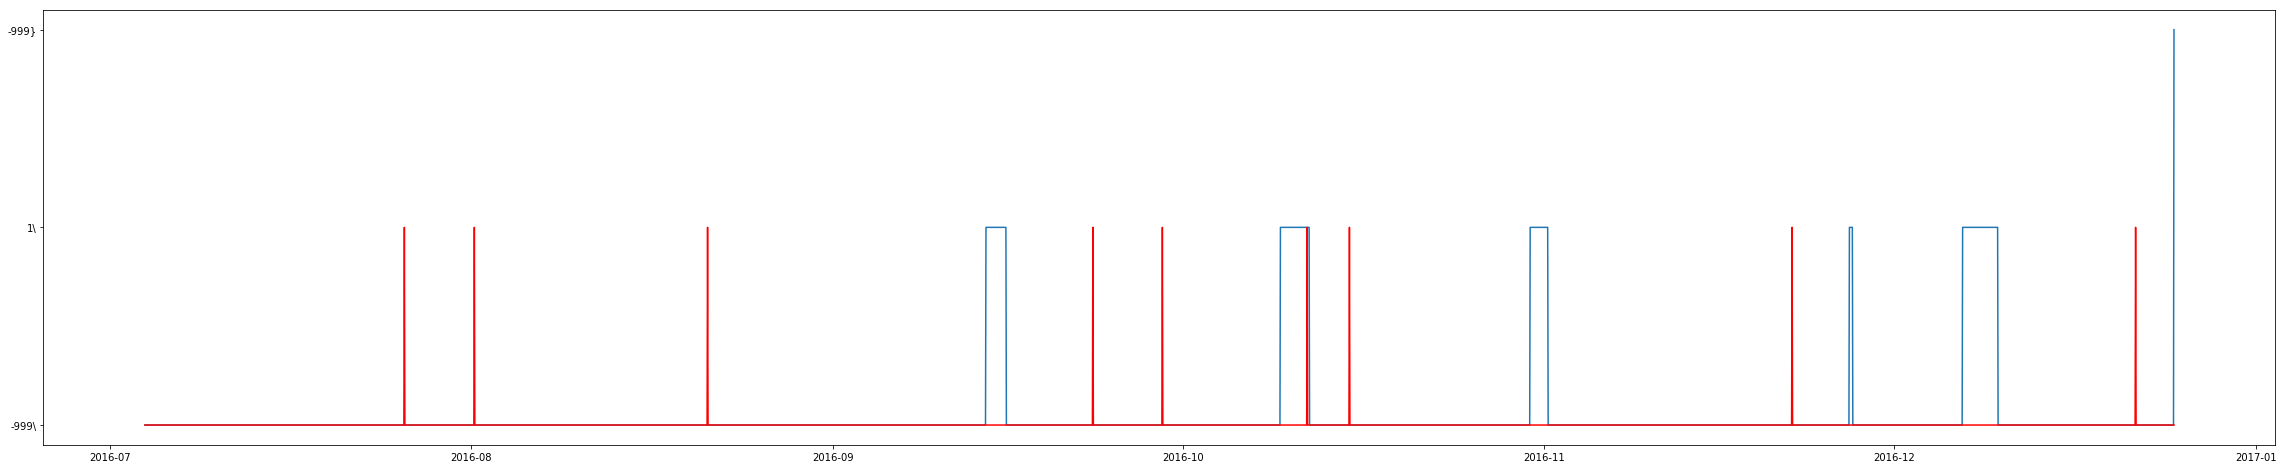

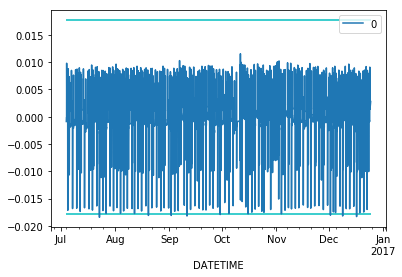

Threshold - 0    0.017812
Name: 0.998, dtype: float64
Column Index --- 13, Column Name -- P_J269


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


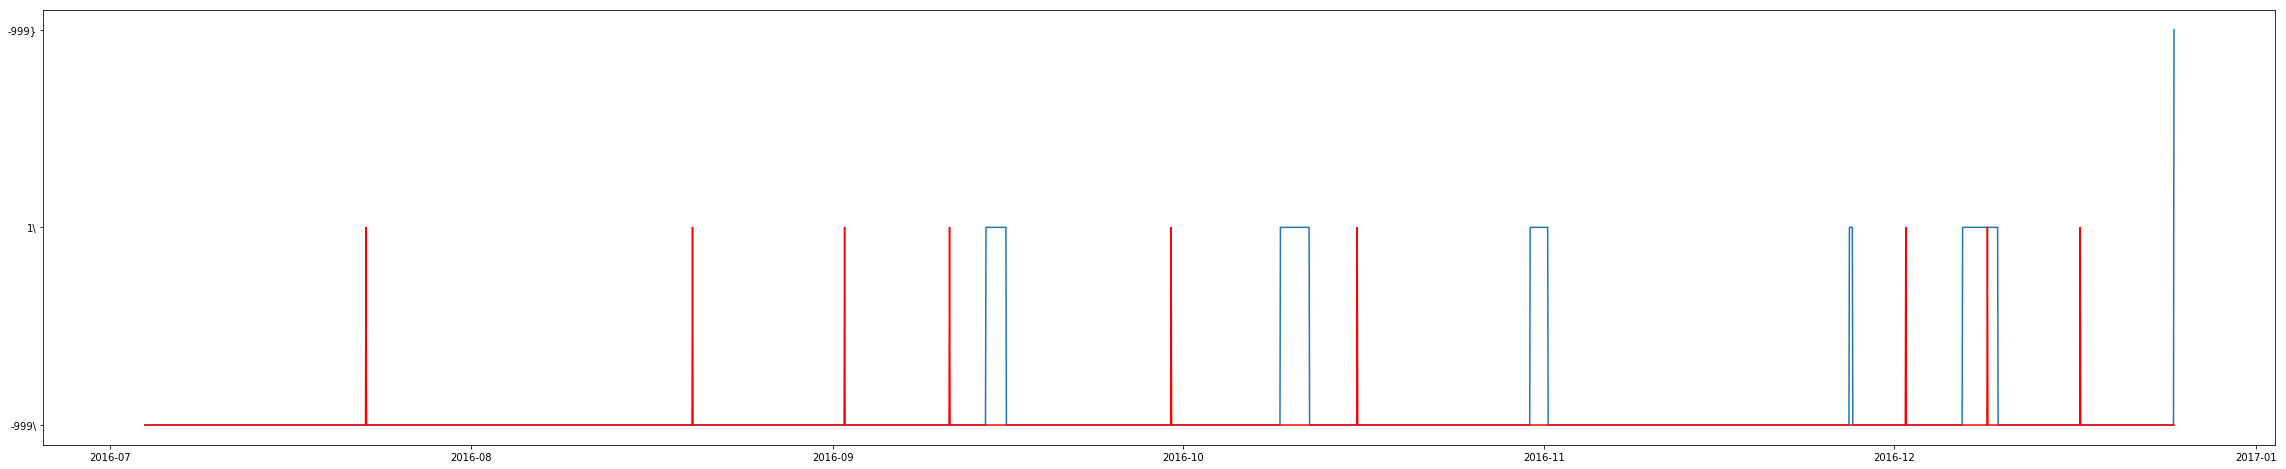

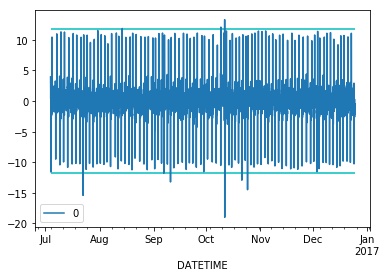

Threshold - 0    11.747234
Name: 0.998, dtype: float64
Column Index --- 14, Column Name -- P_J300


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


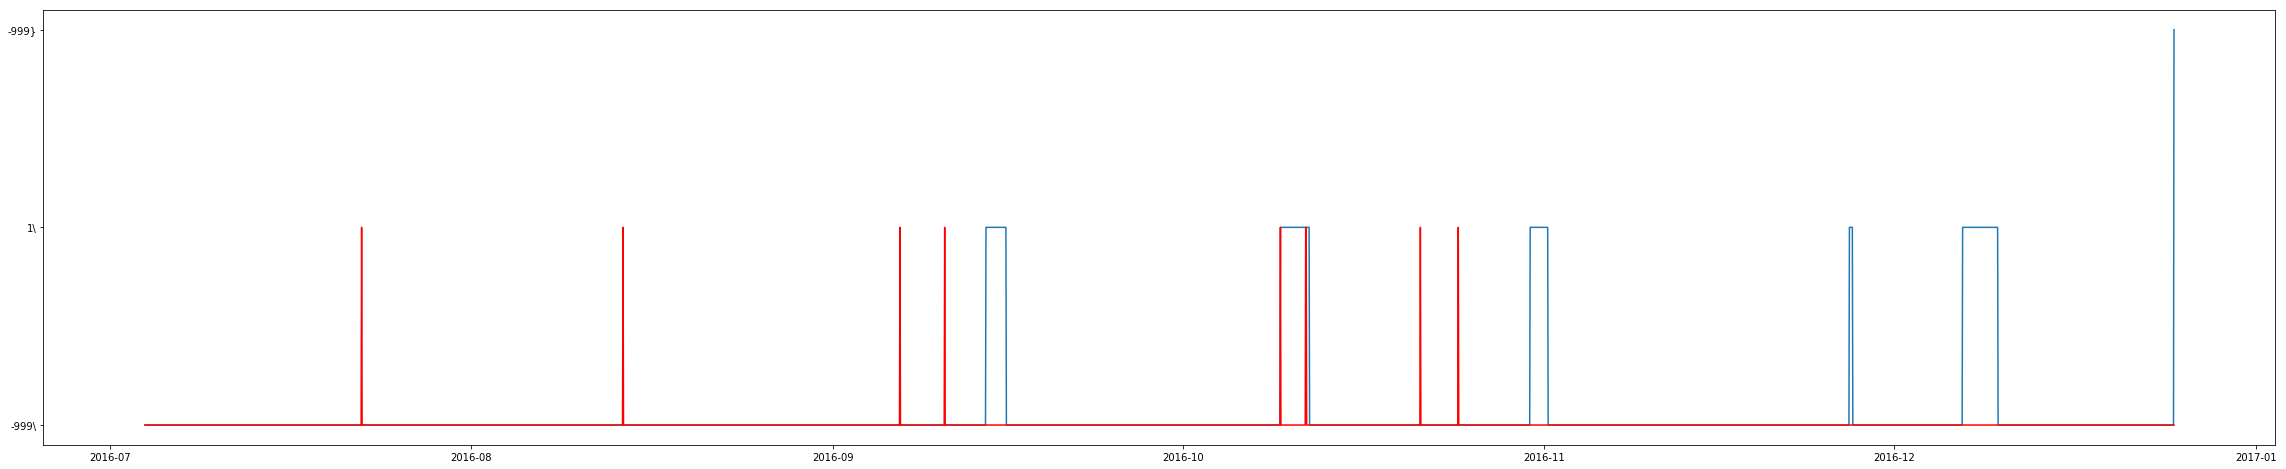

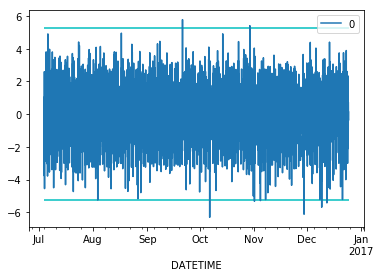

Threshold - 0    5.244008
Name: 0.998, dtype: float64
Column Index --- 15, Column Name -- P_J256


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


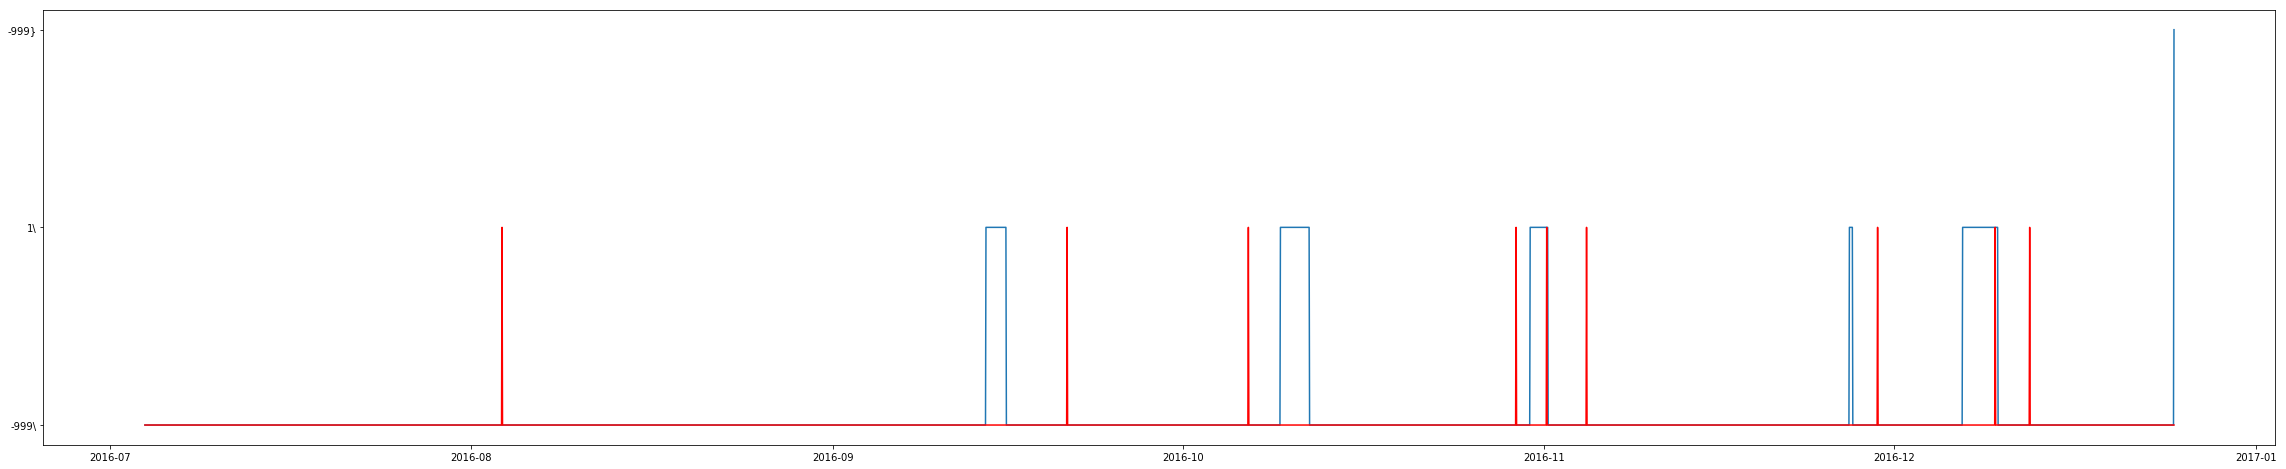

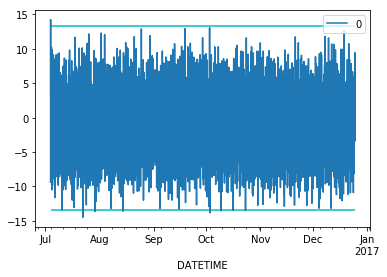

Threshold - 0    13.375767
Name: 0.998, dtype: float64
Column Index --- 16, Column Name -- P_J289


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


Column Index --- 17, Column Name -- P_J415


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


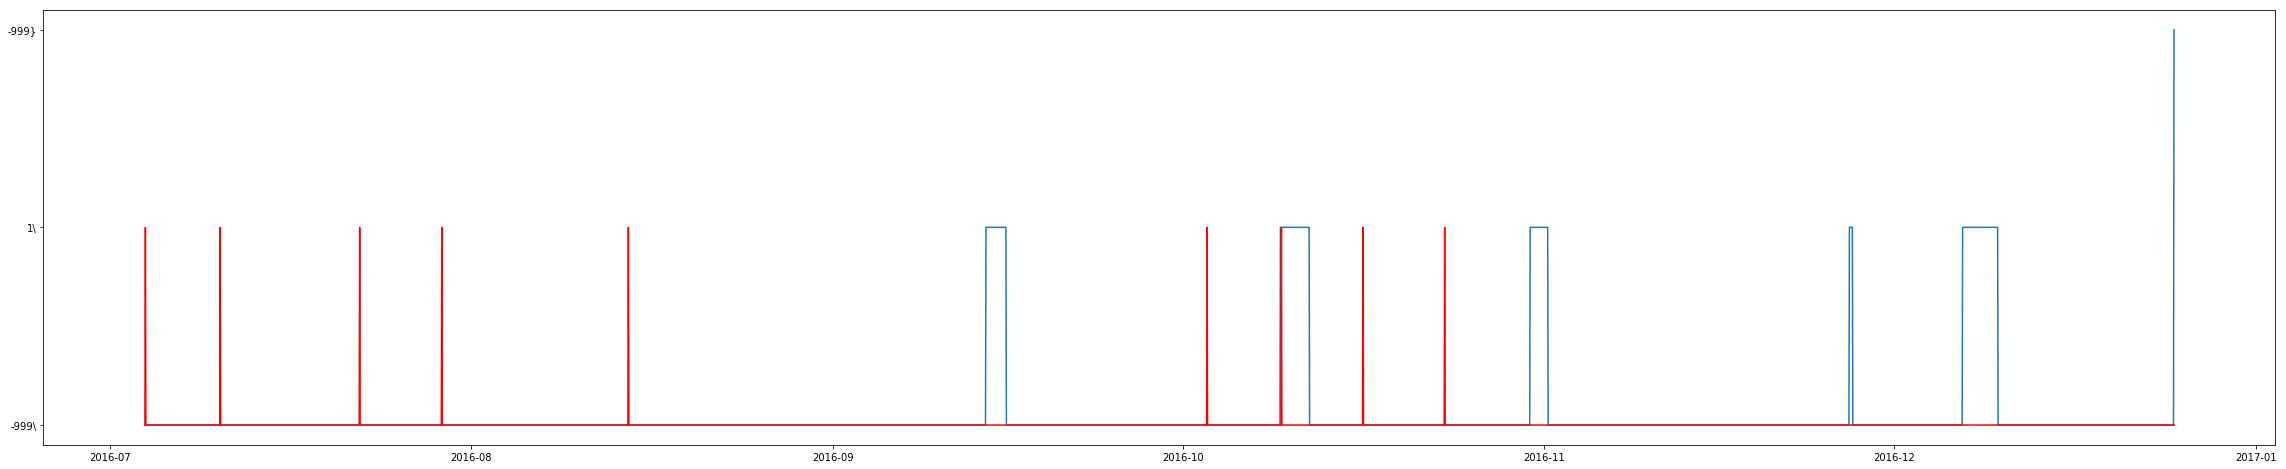

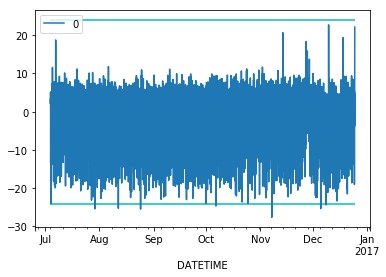

Threshold - 0    24.051251
Name: 0.998, dtype: float64
Column Index --- 18, Column Name -- P_J302


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


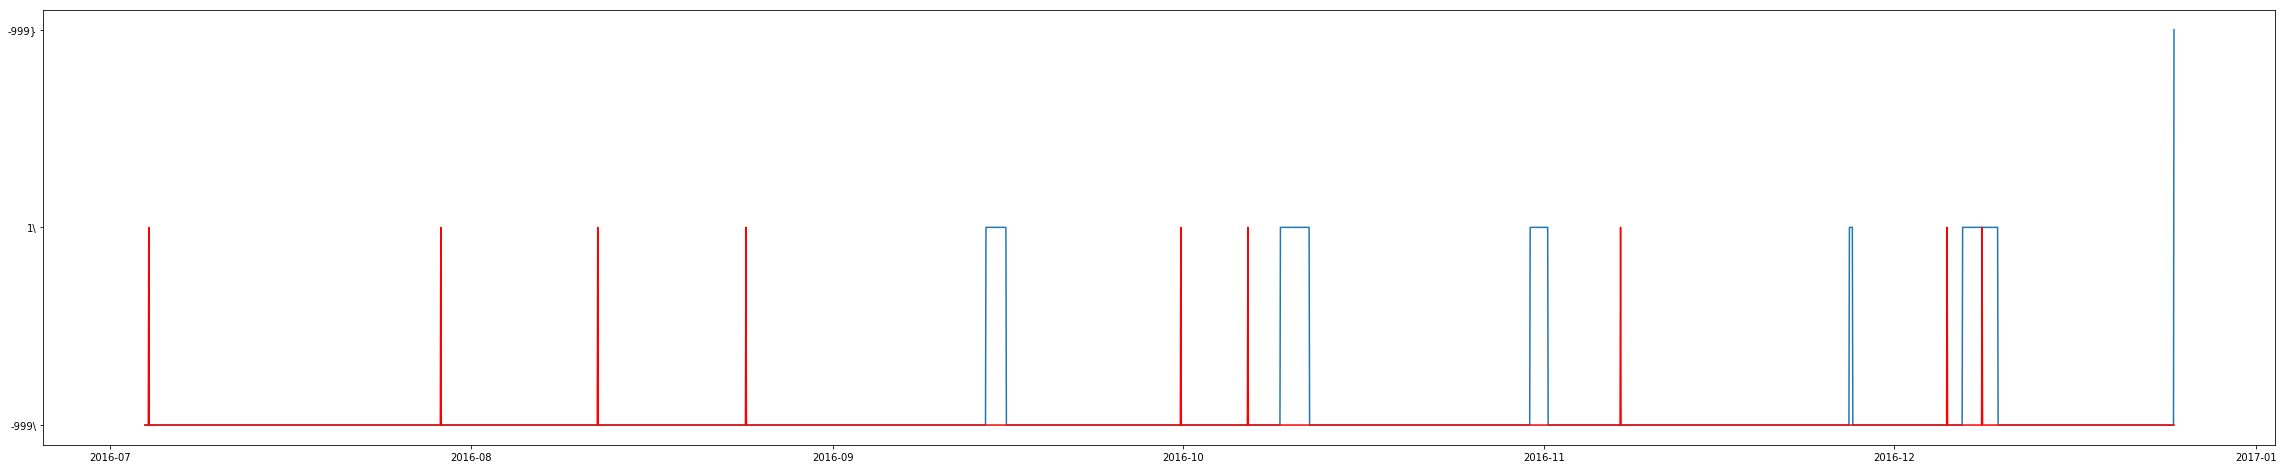

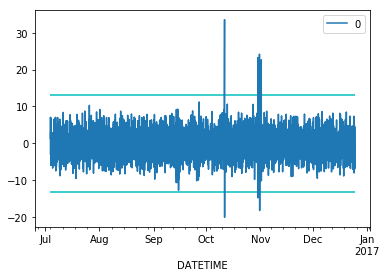

Threshold - 0    13.194053
Name: 0.998, dtype: float64
Column Index --- 19, Column Name -- P_J306


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


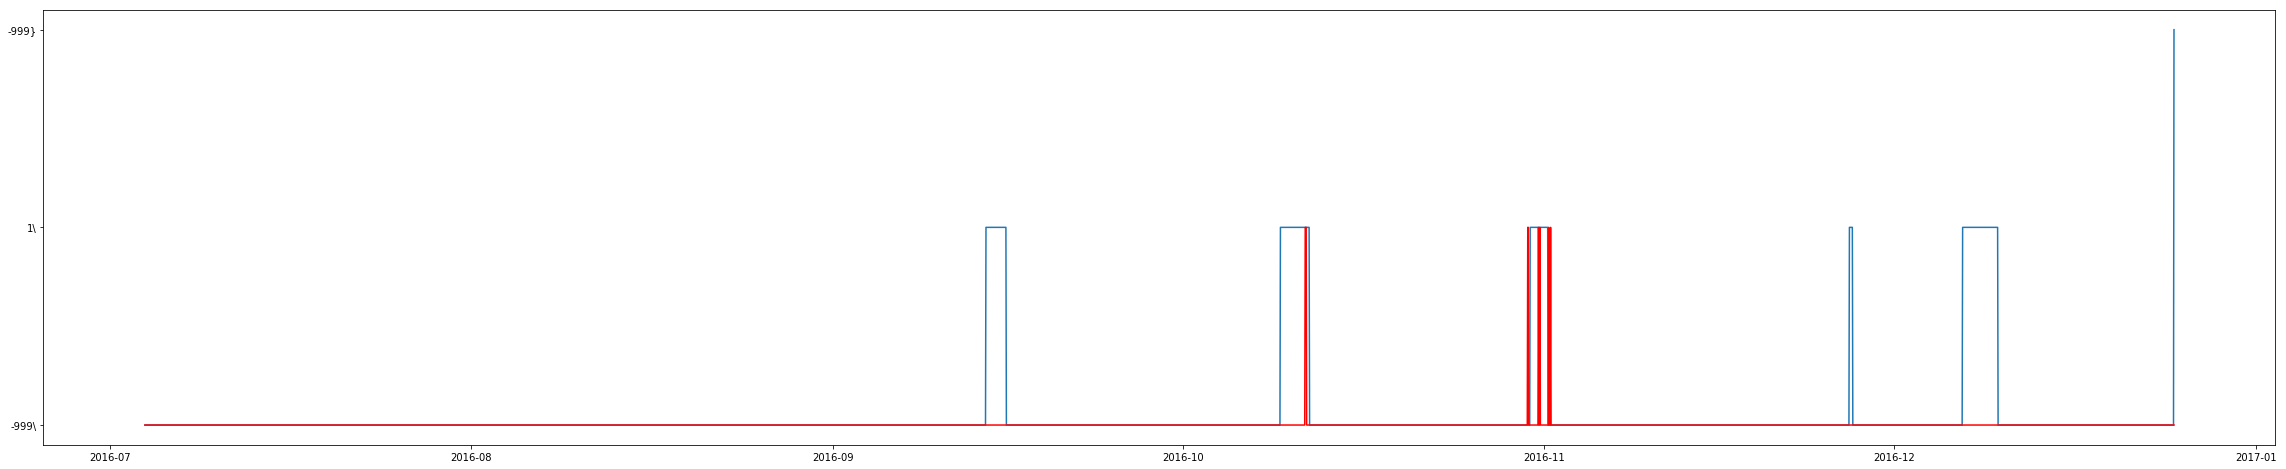

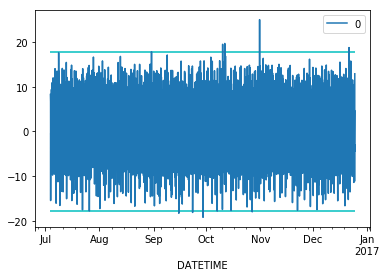

Threshold - 0    17.861537
Name: 0.998, dtype: float64
Column Index --- 20, Column Name -- P_J307


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


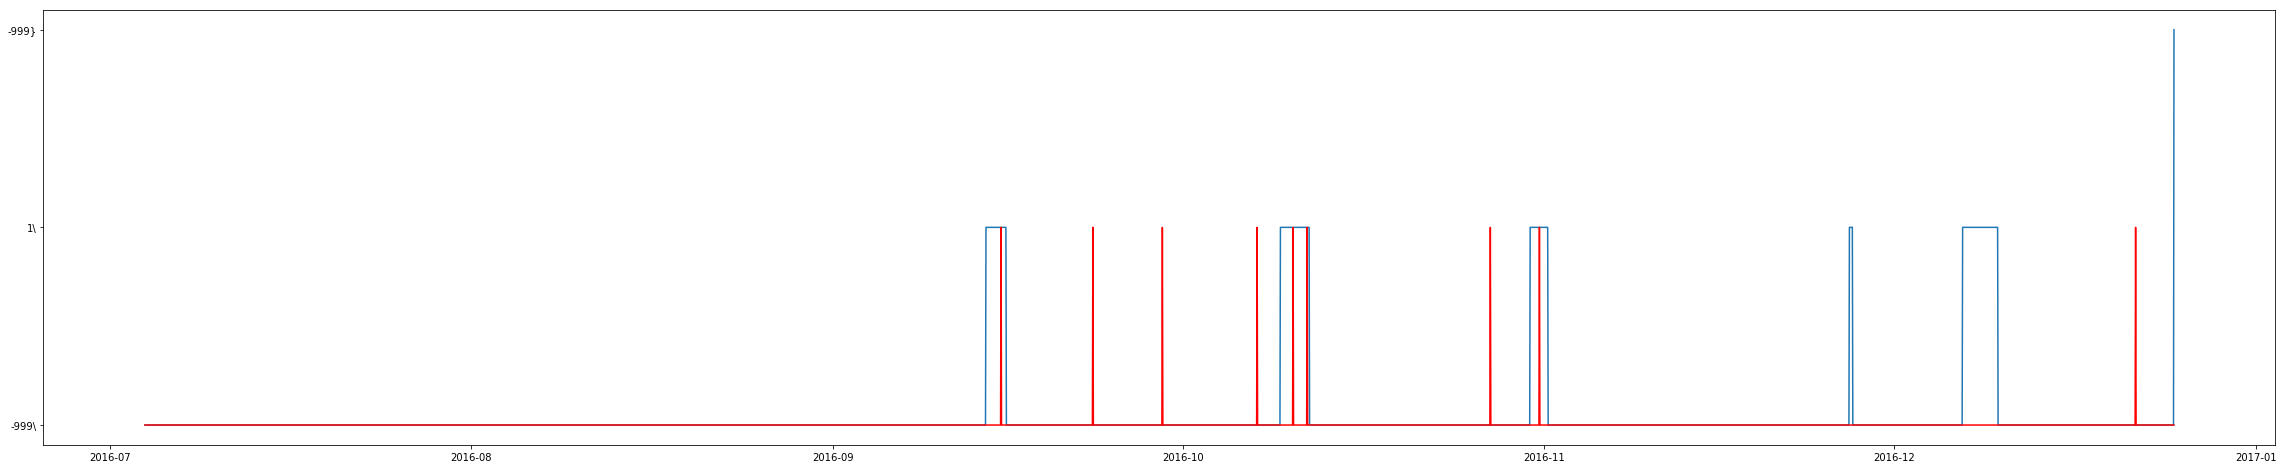

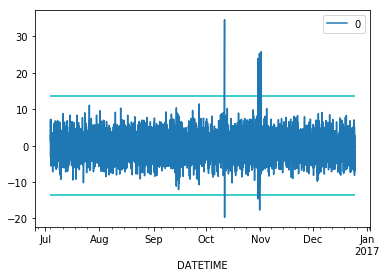

Threshold - 0    13.570791
Name: 0.998, dtype: float64
Column Index --- 21, Column Name -- P_J317


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


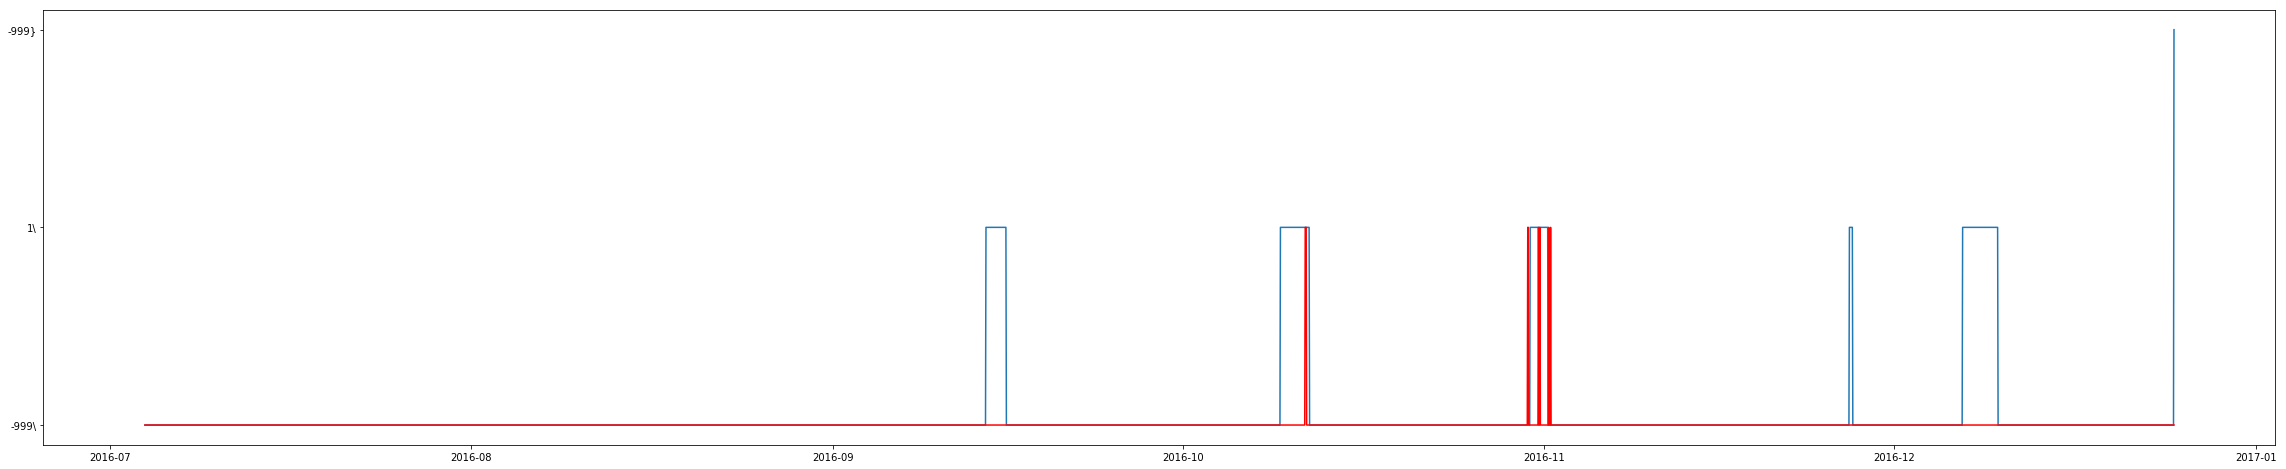

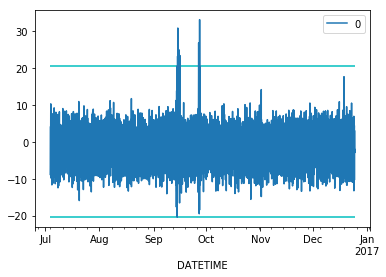

Threshold - 0    20.488783
Name: 0.998, dtype: float64
Column Index --- 22, Column Name -- P_J14


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


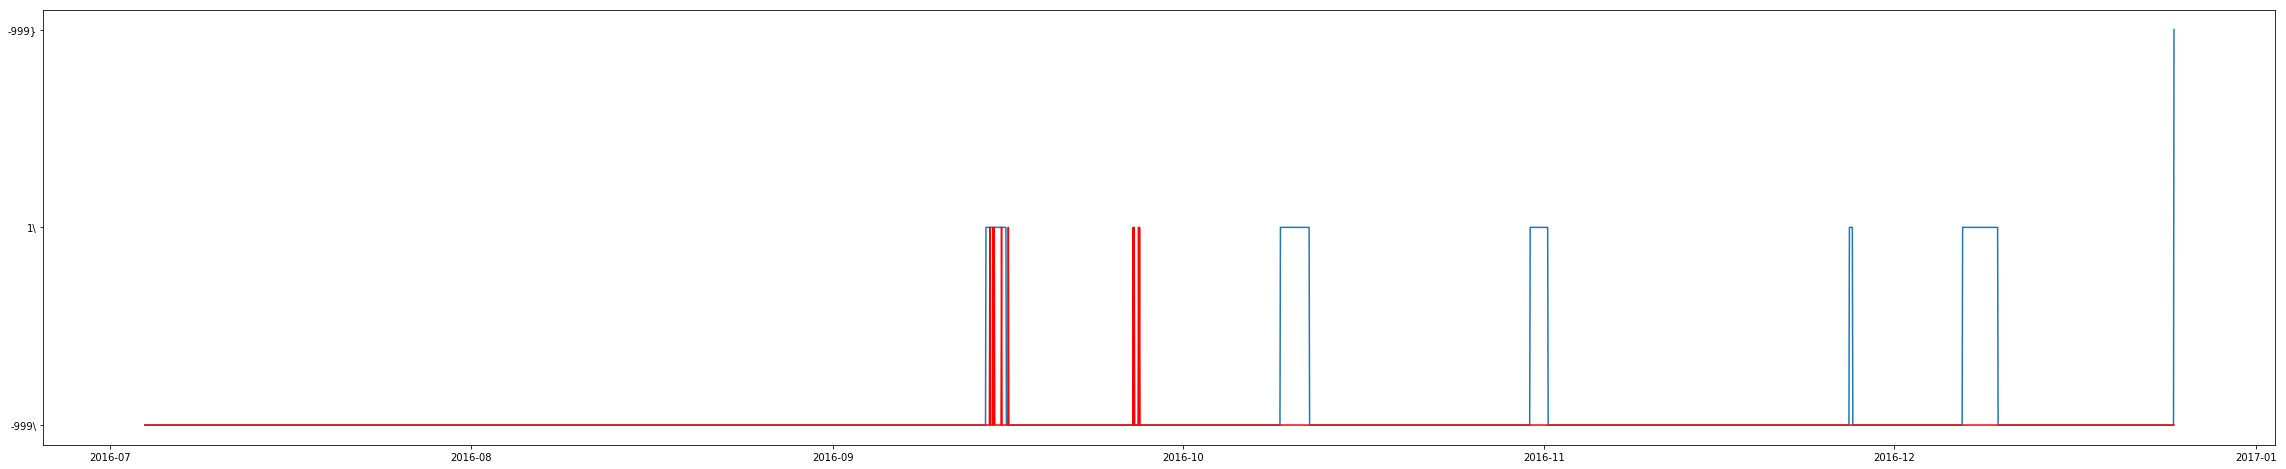

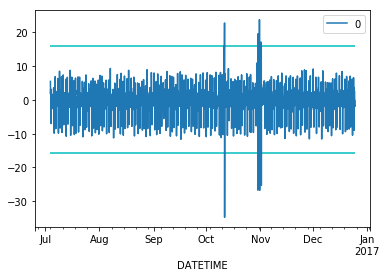

Threshold - 0    15.848552
Name: 0.998, dtype: float64
Column Index --- 23, Column Name -- P_J422


/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/Users/navinLR/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


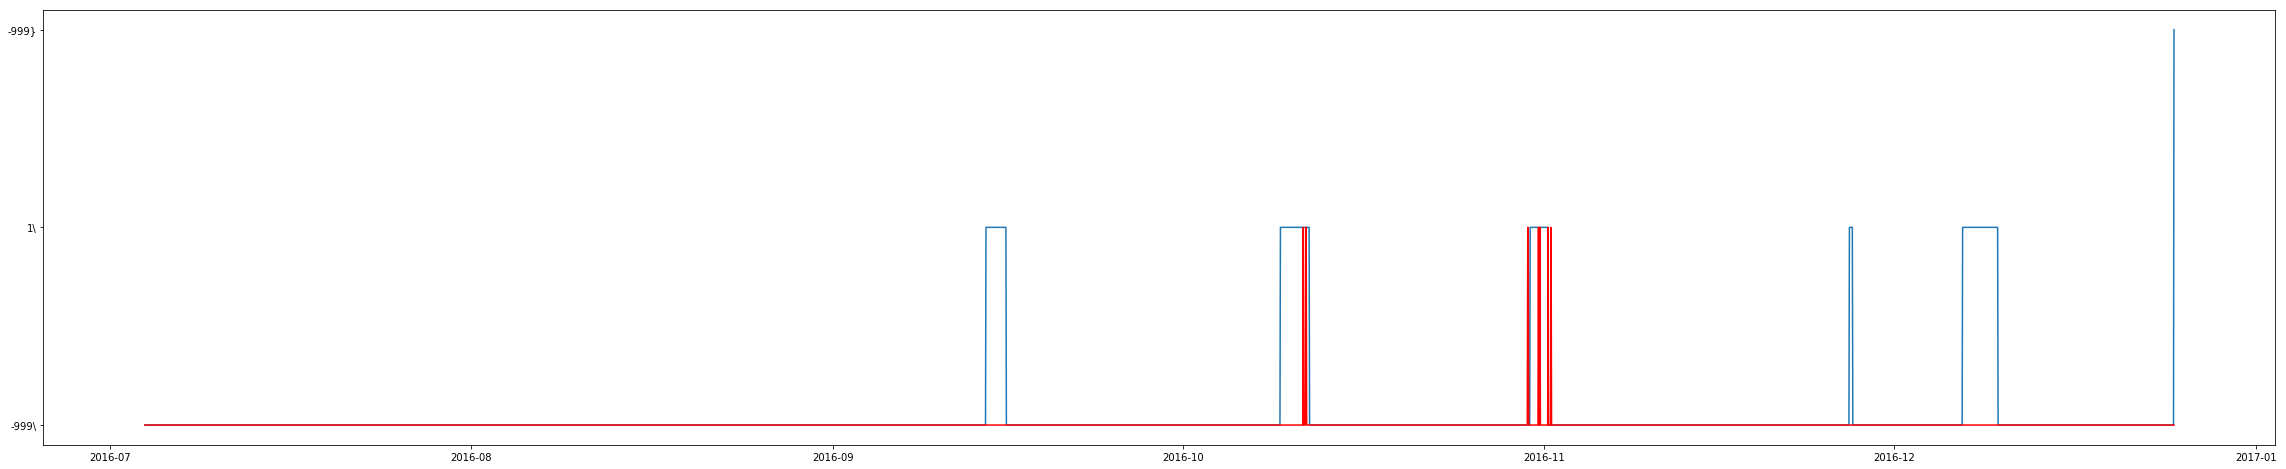

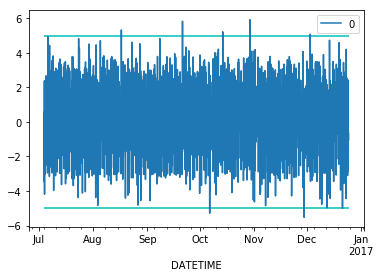

Threshold - 0    4.96341
Name: 0.998, dtype: float64
Column Index --- 24, Column Name --  ATT_FLAG


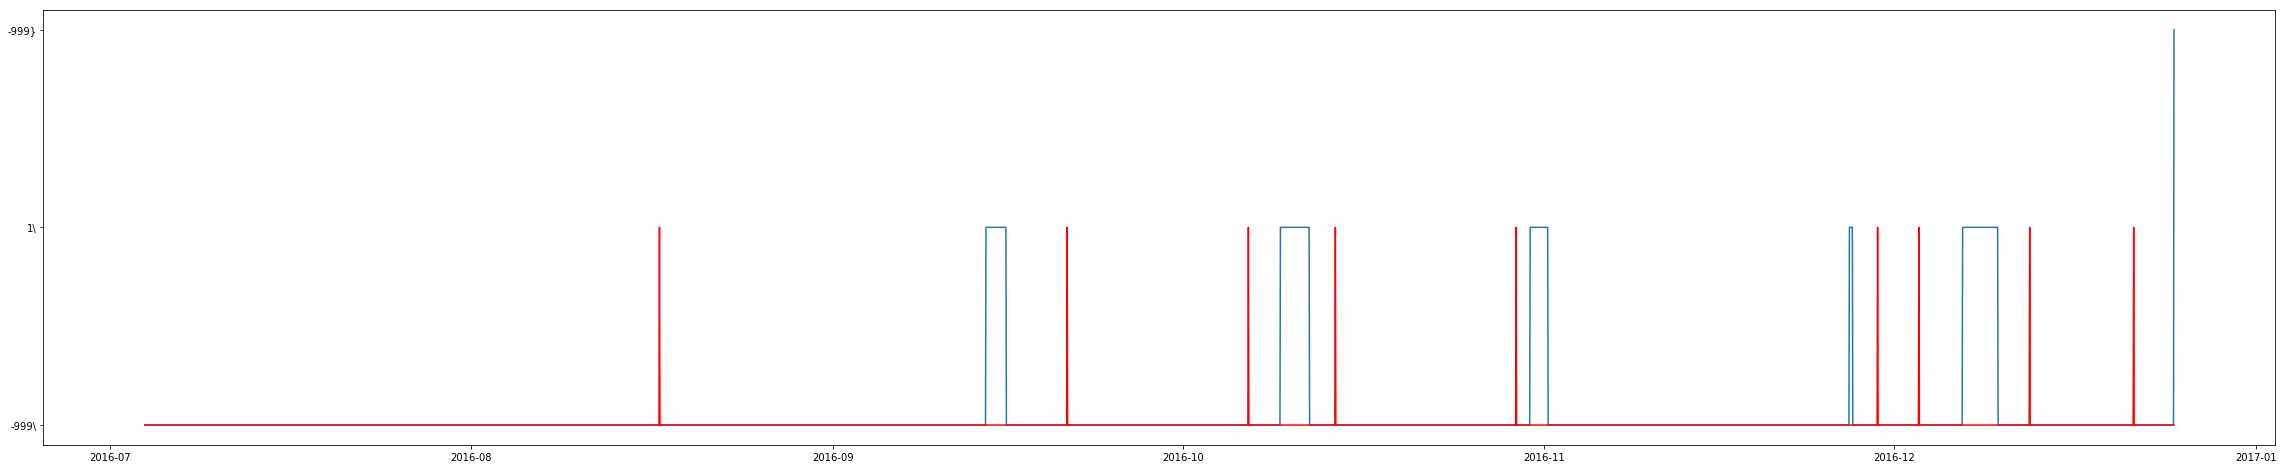

In [8]:

thres_list=[]
prediction_list = []



x = arma_tune1.index
for idx in range(len(q_list)):
    try:
        index = idx + 1
        # plot residual errors
        print("Column Index --- " +str(index) + ", Column Name -- " + str(arma_tune1.columns.values[index]))
        mod=sm.tsa.ARMA(arma_tune1.iloc[:,index],(p_list[idx],q_list[idx])).fit(disp=0)
        residuals = DataFrame(mod.resid)
        residuals.plot()
        thres = abs(residuals).quantile(q=0.998)
        plt.hlines(thres, x[0], x[-1],colors = "c")
        plt.hlines(-thres, x[0], x[-1],colors = "c")
        plt.show()

        print("Threshold - " +str(thres))
        thres_list.append(thres[0])

        plt.figure(figsize=(40,8))
        plt.plot(arma_tune_label)
        prediction=(abs(residuals)>thres[0])*1
        plt.plot(prediction, color='red')
        prediction_list.append(prediction)
    except:
        prediction_list.append([])
        thres_list.append([])

In [11]:
# Training Results - Conf.Matrix , Precision, Recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
print("No.of Attacks - " + str(sum(label_temp.astype(int))))

#  true negatives  false positives
#  false negatives  true positives

recall=[]
precision=[]
cm=[]
signal_index=[]
for i in range(len(thres_list)):
    if thres_list[i] == []:
        precision.append(0)
        recall.append(0)
    else:
        preciciton_array = prediction_list[i].as_matrix(columns=prediction_list[i].columns[0:])[:,0]
        cm_i=confusion_matrix(preciciton_array.astype(int),label_temp.astype(int))
        cm.append(cm_i)
        precision_i = precision_score(preciciton_array.astype(int), label_temp.astype(int))
        recall_i = recall_score(preciciton_array.astype(int), label_temp.astype(int))
        recall.append(recall_i)
        precision.append(precision_i)
        
        if precision_i > 0.01 and recall > 0.01:
            signal_index.append(i)
        

recall_max = np.argmax(recall)
precision_max = np.argmax(precision)

selected_signals = np.array(continuous_columns)[signal_index]

print("Best SIGNAL Set")
print(selected_signals)

print("BEST SIGNAL")
print(continuous_columns[recall_max])
print(cm[recall_max])
print("Recall - " + str(recall[recall_max]))
print("Precision - " + str(precision[precision_max]))

No.of Attacks - 219
Best SIGNAL Set
['P_J280' 'P_J415' 'P_J302' 'P_J306' 'P_J307' 'P_J317']
BEST SIGNAL
P_J415
[[3954  214]
 [   4    5]]
Recall - 0.5555555555555556
Precision - 0.0228310502283105


/Users/navinLR/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  
/Users/navinLR/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [ ]:
[[3954  214]
 [   4  24]]